# HW2

## Part 1 [10 pts]: Get Familiar with GitHub

### Problem 1 [5 pts]:  Git and recovering from a mistake

Cloning the repo

In [1]:
%%bash
cd /tmp
git clone git@github.com:icweaver/playground.git

fatal: destination path 'playground' already exists and is not an empty directory.


Accidentally pull down `mybranch1` 

In [2]:
%%bash
cd /tmp/playground/
git pull origin mybranch1
ls

Merge made by the 'recursive' strategy.
 books.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 books.md
README.md
books.md
feature.txt
intro.md
messages.md
world.md


From github.com:icweaver/playground
 * branch            mybranch1  -> FETCH_HEAD


Yep, we have a problem

In [3]:
%%bash
cd /tmp/playground/
git status

On branch master
Your branch is ahead of 'origin/master' by 2 commits.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


Let's fix it by resetting

In [4]:
%%bash
cd /tmp/playground/
git reset --hard origin/master
ls

HEAD is now at 0bcf68b Shared attribution between Joe and Sally.
README.md
feature.txt
intro.md
messages.md
world.md


Let's just double check that everything is all good

In [5]:
%%bash
cd /tmp/playground/
git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


### Problem 2 [5 pts]:  Git and checking out a single file

Add and fetch from master branch on `course`

In [6]:
%%bash
cd /tmp/playground/
git remote add course https://github.com/IACS-CS-207/playground.git
git fetch course

fatal: remote course already exists.


Now let's checkout just the `README` from `course`

In [7]:
%%bash
cd /tmp/playground/
git checkout course/master -- README.md
cat README.md

# Playground Repo

For practicing.


Now commit and push to local repo

In [8]:
%%bash
cd /tmp/playground/
git status
git add README.md # has it been updated yet?
git commit -m 'adding README from course to local repo'
git status
# git push -u origin master

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean
On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


## Part 2 [20 pts]: Python Basics

### Problem 3 [10 pts]: Count and Plot

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import collections

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Read in `languages.txt`

In [10]:
# read in file, split and count languages
with open('languages.txt') as f:
    read_data = f.read().split()

# save in Counter object
langs = collections.Counter(read_data)

# format and print language stats
for lang_name, lang_count in langs.items():
    print(f'{lang_name}: {lang_count}')

Python: 25
C++: 6
Java: 7
C: 1
Other: 2
C#: 1
SQL: 2
VB: 1


Stats plot

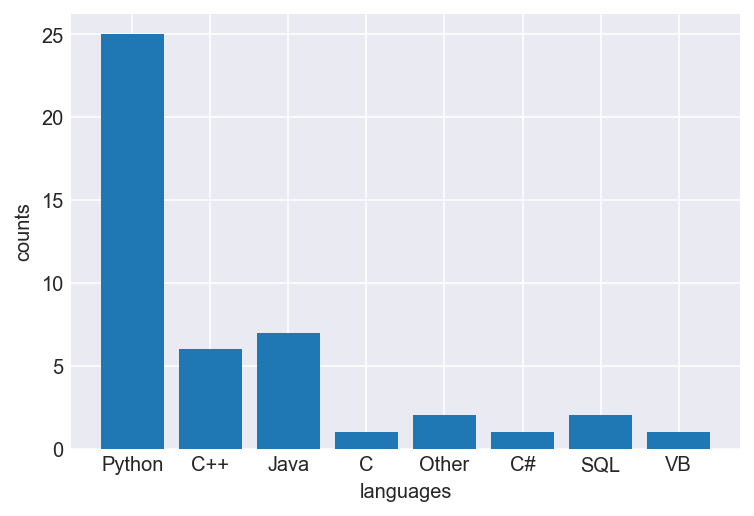

In [11]:
sns.set_style('darkgrid') # to prettify matplotlib

# extract languange names and counts from langs dict
x_coords, freqs = langs.keys(), langs.values()

# display frequency plot
plt.bar(x_coords, freqs)
plt.xlabel('languages')
plt.ylabel('counts')
plt.show()

### Problem 4 [10 pts]: Average Area of the Circles (Part 1)

In [12]:
# read in circles.dat
with open('circles.txt') as f:
    read_data = f.read().split()

# convert strings to floats using some list comprehension 
read_data = [float(i) for i in read_data]

In [13]:
pi = 3.14159265359
def area_circ(radii):
    # returns list of computed areas or circle 
    # given list of radii
    return [pi * r**2 for r in radii]

In [14]:
def myave(radii, avg_func):
    areas = avg_func(radii) # compute list of areas
    avg = sum(areas) / len(areas)
    return avg

In [15]:
# display average area
print(f'average area: {myave(read_data, area_circ)} units^2')

average area: 3.1958990970822003 units^2


## Part 3 [30 pts]: Closures and Decorators

### Problem 5 [10 pts]: Simple Bank Account Withdraw System

#### Part a

In [16]:
def make_withdraw(balance):
    def update_balance(debit):
        # some placeholder for the new balance for now.
        if debit <= 100:
            balance = 42 
            print(f"New balance: {balance}")
        else:
            print("Please enter a withdrawl amount less than or equal to \
                   your current balance.")
    return update_balance

init_balance = 500 # initial balance
withdraw_amount = 100 # amount to withdraw

wd = make_withdraw(init_balance)
wd(withdraw_amount)

New balance: 42


This does not behave correctly because I have not implemented a withdrawal from the initial balance yet.

#### Part b

In [17]:
def make_withdraw(balance):
    def update_balance(debit):
        if debit <= balance:
            balance -= debit
            print(f"New balance: {balance}")
        else:
            print("Please enter a withdrawl amount less than or equal to \
                   your current balance.")
    return update_balance

init_balance = 500 # initial balance
withdraw_amount = 100 # amount to withdraw

wd = make_withdraw(init_balance)
wd(withdraw_amount)

UnboundLocalError: local variable 'balance' referenced before assignment

This doesn't work because update_balance is trying to use the variable `balance` which is outside of its scope. We need to let Python know that it is a nonlocal variable in the next section.

#### Part c

In [18]:
def make_withdraw(balance):
    def update_balance(debit):
        # places the variable 'balance' in the outer scope of make_withdraw 
        # into the inner scope of update_balance
        nonlocal balance
        if debit <= balance:
            balance -= debit
            print(f"New balance: ${balance:.2f}")
        else:
            print("Please enter a withdrawl amount " 
                  "less than or equal to your current balance.")
    return update_balance

init_balance = 500 # initial balance
withdraw_amount = 150.50 # amount to withdraw

wd = make_withdraw(init_balance)
wd(withdraw_amount)

New balance: $349.50


#### Part d

In [19]:
from IPython.display import HTML # Allows us to embed HTML into our notebook.
HTML("""<iframe width="800" height="500" frameborder="0" src="http://pythontutor.com/iframe-embed.html#code=def%20make_withdraw%28balance%29%3A%0A%20%20%20%20def%20update_balance%28debit%29%3A%0A%20%20%20%20%20%20%20%20%23%20places%20the%20variable%20'balance'%20in%20the%20outer%20scope%20of%20make_withdraw%20%0A%20%20%20%20%20%20%20%20%23%20into%20the%20inner%20scope%20of%20update_balance%0A%20%20%20%20%20%20%20%20nonlocal%20balance%0A%20%20%20%20%20%20%20%20if%20debit%20%3C%3D%20balance%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20balance%20-%3D%20debit%0A%20%20%20%20%20%20%20%20%20%20%20%20print%28f%22New%20balance%3A%20%24%7Bbalance%3A.2f%7D%22%29%0A%20%20%20%20%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20print%28%22Please%20enter%20a%20withdrawl%20amount%20%22%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%22less%20than%20or%20equal%20to%20your%20current%20balance.%22%29%0A%20%20%20%20return%20update_balance%0A%0Ainit_balance%20%3D%20500%20%23%20initial%20balance%0Awithdraw_amount%20%3D%20150.50%20%23%20amount%20to%20withdraw%0A%0Awd%20%3D%20make_withdraw%28init_balance%29%0Awd%28withdraw_amount%29&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=0&heapPrimitives=nevernest&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>""")

### Problem 6

Reading in the list of radii from `circles.txt` and computing areas again here to keep things self-contained. 

In [20]:
import numpy as np

# open the file
with open('circles.txt') as f:
    radii = f.read().split()

# convert strings to floats using some list comprehension 
radii = [float(i) for i in radii]

# function to compute the areas
pi = 3.14159265359
def area_circ(radii):
    # returns list of computed areas or circle given list of radii
    return [pi * r**2 for r in radii]

# store list of computed areas
area_list = area_circ(radii)
# converting to array for numpy method
area_array = np.array(area_list) 

Setting up the timer.

In [21]:
import time
def timer(f):
    def inner(*args):
        t0 = time.time()
        output = f(*args)
        elapsed = time.time() - t0
        print("Time Elapsed", elapsed)
        return output
    return inner

Timing list method first:

In [22]:
@timer
def myave_list(num_list):
    tot = 0 # running total of num_list
    for N, n in enumerate(num_list, 1): 
        # N starts at 1 and iterates up to length of num_list 
        tot +=n
    return tot/N

myave_list(area_list)

Time Elapsed 6.008148193359375e-05


3.1958990970822003

And now with the numpy method:

In [23]:
@timer
def myave_np(num_array):
    # assumes num_array is a numpy array
    return np.mean(num_array)

myave_np(area_array)

Time Elapsed 6.29425048828125e-05


3.1958990970822043

### Problem 7

Sign checker decorator.

In [24]:
def check_sign(f):
    def inner(*args, **kwargs):
        output = f(*args, **kwargs)
        if output < 0:
            print("Funtion returns a negative value")
        elif output > 0:
            print("Funtion returns a positive value")
        else:
            print("Function returns a value of zero")
        return output
    return inner

Discrimant function

In [25]:
@check_sign
def discr(*args, **kwargs):
    d = kwargs['b']**2 - 4*kwargs['a']*kwargs['c']
    return d

# positive case
params = {'a':1, 'b':4, 'c':2}
print(discr(**params))

#negative case
params = {'a':1, 'b':1, 'c':2}
print(discr(**params))

Funtion returns a positive value
8
Funtion returns a negative value
-7


Absolute value function

In [26]:
@check_sign
def abs_val(x):
    if x < 0:
        x = -x
    return x

num = -4
abs_val(num)

Funtion returns a positive value


4

Wavy function

In [27]:
@check_sign
def func_sin(x):
    return x - x**3/(3*2) + x**5/(5*4*3*2)

# positive case
num = 0.1
print(func_sin(num))

# negative case
num = -0.1
print(func_sin(num))

Funtion returns a positive value
0.09983341666666667
Funtion returns a negative value
-0.09983341666666667
